<a href="https://colab.research.google.com/github/FariaParvinMegha/final_work/blob/main/Arousal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install git+https://github.com/forrestbao/pyeeg.git

!pip install keras-self-attention

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-nkbwvq6o
  Running command git clone --filter=blob:none --quiet https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-nkbwvq6o
  Resolved https://github.com/forrestbao/pyeeg.git to commit a6c18bb093e4748f9d9c208535a6ae024a0802b8
  Preparing metadata (setup.py) ... done
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28111 sha256=64e5ff202bd27c1c8f95607f1e63dd7bd08184f9622c70d114f9bd8b4a5de536
  Stored in directory: /tmp/pip-ephem-wheel-cache-zw4rbeq5/wheels/a8/c4/1a/cee09dcc12a11620066d35ace42e3c1e3bfbcc1db3a0ce7788
Successfully built pyeeg
  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18894 sha256=e3b4eef5c86994975791c569d1b33a6c07f23948ec693a0c4f67cfd42060b6de
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built kera

In [3]:
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn import svm
import tensorflow as tf
import os
import time
import keras
import keras.backend as K

import tensorflow as tf
from tensorflow import keras
from keras.metrics import Precision, Recall
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv1D
from keras.models import Model
from keras.utils import plot_model

import timeit
from keras.layers import MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from keras_self_attention import SeqSelfAttention
from keras.layers import (Input, Embedding, Conv1D, Activation, GlobalMaxPooling1D, BatchNormalization,
                          Concatenate, LSTM, Flatten, Dropout, Dense)

In [4]:
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [5]:
np.load = np_load_old

TRAINING

In [6]:
with open('/content/drive/MyDrive/data_training/data_training.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)

with open('/content/drive/MyDrive/label_training/label_training.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)


X = normalize(X)
Z = np.ravel(Y[:, [0]])

Arousal_Train = np.ravel(Y[:, [0]])
Valence_Train = np.ravel(Y[:, [1]])
Dominance_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

for i in range(len(Z)):
  if Z[i] == 9:
    Z[i] = 8.99

In [7]:
A=np.copy(Z)

In [8]:
# AROUSAL classes
negative = 0
neutral = 0
positive = 0
for i in range(len(A)):
  if A[i] >= 1 and A[i]<=2.99:
    A [i] = 1
    negative = negative + 1
  if A[i] >= 3 and A[i]<=5.99:
    A [i] = 2
    neutral = neutral + 1
  if A[i] >= 6 and A[i]<=8.99:
    A [i] = 3
    positive = positive + 1

print(negative,neutral, positive)

84328 202262 213122


In [9]:
x_train = np.array(X[:])

In [10]:
from keras.utils import to_categorical
y_train = to_categorical(A)
y_train = y_train[:,1:]
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

VAALIDATION

In [11]:
with open('/content/drive/MyDrive/data_validation/data_validation.npy', 'rb') as fileTrain:
    P  = np.load(fileTrain)

with open('/content/drive/MyDrive/label_validation/label_validation.npy', 'rb') as fileTrainL:
    Q  = np.load(fileTrainL)

P = normalize(P)
R = np.ravel(Q[:, [0]])

Arousal_val = np.ravel(Q[:, [0]])
Valence_val = np.ravel(Q[:, [1]])
Domain_val = np.ravel(Q[:, [2]])
Like_val = np.ravel(Q[:, [3]])

for i in range(len(R)):
  if R[i] == 9:
    R[i] = 8.99

In [12]:
B=np.copy(R)

In [13]:
# AROUSAL classes
negative_val = 0
neutral_val = 0
positive_val = 0
for i in range(len(B)):
  if B[i] >= 1 and B[i]<=2.99:
    B [i] = 1
    negative_val = negative_val + 1
  if B[i] >= 3 and B[i]<=5.99:
    B [i] = 2
    neutral_val = neutral_val + 1
  if B[i] >= 6 and B[i]<=8.99:
    B [i] = 3
    positive_val = positive_val + 1

print(negative_val,neutral_val, positive_val)

10540 25261 26663


In [14]:
x_val = np.array(P[:])

In [15]:
from keras.utils import to_categorical
y_val = to_categorical(B)
y_val = y_val[:,1:]
y_val

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

TESTING

In [16]:
with open('/content/drive/MyDrive/data_testing/data_testing.npy', 'rb') as fileTrain:
    M  = np.load(fileTrain)

with open('/content/drive/MyDrive/label_testing/label_testing.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)

M = normalize(M)
L = np.ravel(N[:, [0]])

Arousal_Test = np.ravel(N[:, [0]])
Valence_Test = np.ravel(N[:, [1]])
Dominance_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

for i in range(len(L)):
  if L[i] == 9:
    L[i] = 8.99

In [17]:
C=np.copy(L)

In [18]:
# AROUSAL classes
negative_test = 0
neutral_test = 0
positive_test = 0
for i in range(len(C)):
  if C[i] >= 1 and C[i]<=2.99:
    C [i] = 1
    negative_test = negative_test + 1
  if C[i] >= 3 and C[i]<=5.99:
    C [i] = 2
    neutral_test = neutral_test + 1
  if C[i] >= 6 and C[i]<=8.99:
    C [i] = 3
    positive_test = positive_test + 1

print(negative_test,neutral_test, positive_test)

10540 25261 26663


In [19]:
x_test = np.array(M[:])

In [20]:
from keras.utils import to_categorical
y_test = to_categorical(C)
y_test = y_test[:,1:]
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

In [22]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [23]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(499712, 3)
(62464, 3)
(62464, 3)


In [32]:
batch_size = 256
num_classes = 3
epochs = 30
input_shape=(x_train.shape[1], 1)

In [33]:
print(input_shape)

(75, 1)


MATRICES

In [34]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight=sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight=sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

Model CNN

In [35]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense,GRU,SpatialDropout1D,Bidirectional
from keras.regularizers import l2

In [37]:
modelCNN = Sequential()

intput_shape=(x_train.shape[1], 1)

modelCNN.add(Conv1D(1024, kernel_size=9,padding = 'same',activation='relu', input_shape=input_shape))
modelCNN.add(BatchNormalization())
modelCNN.add(MaxPooling1D(pool_size=(2)))

modelCNN.add(Conv1D(512,kernel_size=6,padding = 'same', activation='relu'))
modelCNN.add(BatchNormalization())
modelCNN.add(MaxPooling1D(pool_size=(2)))

modelCNN.add(Conv1D(256,kernel_size=6,padding = 'same', activation='relu'))
modelCNN.add(BatchNormalization())
modelCNN.add(MaxPooling1D(pool_size=(2)))

modelCNN.add(Conv1D(128,kernel_size=6,padding = 'same', activation='relu'))
modelCNN.add(BatchNormalization())
modelCNN.add(MaxPooling1D(pool_size=(2)))

modelCNN.add(Flatten())

modelCNN.add(Dense(1024, activation='relu'))
modelCNN.add(Dropout(0.2))

modelCNN.add(Dense(256, activation='relu'))
modelCNN.add(Dropout(0.2))

modelCNN.add(Dense(64, activation='relu'))
modelCNN.add(Dropout(0.2))

modelCNN.add(Dense(num_classes, activation='softmax'))
modelCNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 75, 1024)          10240     
                                                                 
 batch_normalization_12 (Ba  (None, 75, 1024)          4096      
 tchNormalization)                                               
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 37, 1024)          0         
 ng1D)                                                           
                                                                 
 conv1d_13 (Conv1D)          (None, 37, 512)           3146240   
                                                                 
 batch_normalization_13 (Ba  (None, 37, 512)           2048      
 tchNormalization)                                               
                                                      

In [38]:
modelCNN.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy', Precision(), F1Score()]
)

In [39]:
model_name = "CNN_model"
directory_path = "/content/drive/MyDrive/Final work"
weights_filename = "weights-improvement_" + model_name + ".hdf5"
os.makedirs(directory_path, exist_ok=True)

# Complete file path for the model weights
filepath_CLB = os.path.join(directory_path, weights_filename)
print("Model weights will be saved to:", filepath_CLB)

checkpoint = ModelCheckpoint(filepath_CLB, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.2, patience=2, min_lr=0.001, verbose=1)

# Combine all callbacks in a list
callbacks_list = [es, checkpoint, reduce_lr]

Model weights will be saved to: /content/drive/MyDrive/Final work/weights-improvement_CNN_model.hdf5


In [40]:
FCNNmodel = modelCNN.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks= callbacks_list)

Epoch 1/30
1952/1952 [==============================] - ETA: 0s - loss: 0.8599 - accuracy: 0.5722 - precision_2: 0.6552 - f1_score: 0.4947
Epoch 1: val_accuracy improved from -inf to 0.62742, saving model to /content/drive/MyDrive/Final work/weights-improvement_CNN_model.hdf5
1952/1952 [==============================] - 184s 86ms/step - loss: 0.8599 - accuracy: 0.5722 - precision_2: 0.6552 - f1_score: 0.4947 - val_loss: 0.7743 - val_accuracy: 0.6274 - val_precision_2: 0.7066 - val_f1_score: 0.5741 - lr: 0.0010
Epoch 2/30
1952/1952 [==============================] - ETA: 0s - loss: 0.7262 - accuracy: 0.6545 - precision_2: 0.7263 - f1_score: 0.6202
Epoch 2: val_accuracy improved from 0.62742 to 0.68412, saving model to /content/drive/MyDrive/Final work/weights-improvement_CNN_model.hdf5
1952/1952 [==============================] - 170s 87ms/step - loss: 0.7262 - accuracy: 0.6545 - precision_2: 0.7263 - f1_score: 0.6202 - val_loss: 0.6755 - val_accuracy: 0.6841 - val_precision_2: 0.7466 -

In [41]:
score_CNN = modelCNN.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score_CNN[0])
print('Test accuracy:', score_CNN[1])
print('Test precision:', score_CNN[2])
print('Test f1_score:', score_CNN[3])

1952/1952 [==============================] - 16s 8ms/step - loss: 0.2967 - accuracy: 0.9184 - precision_2: 0.9224 - f1_score: 0.9187
Test loss: 0.2966603636741638
Test accuracy: 0.9184490442276001
Test precision: 0.922385573387146
Test f1_score: 0.9187459945678711


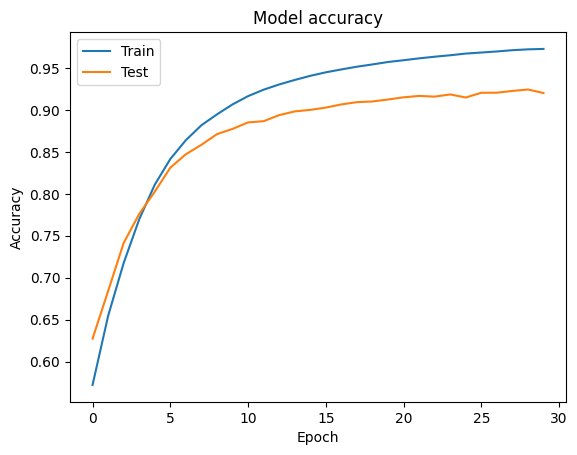

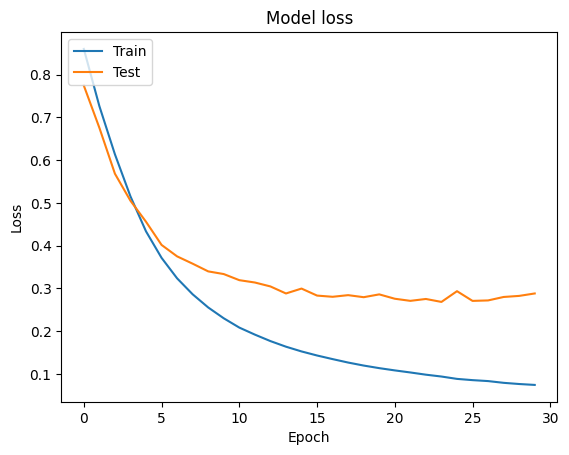

In [43]:
# Plot training & validation accuracy values
plt.plot(FCNNmodel.history['accuracy'])
plt.plot(FCNNmodel.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(FCNNmodel.history['loss'])
plt.plot(FCNNmodel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1952/1952 [==============================] - 10s 5ms/step


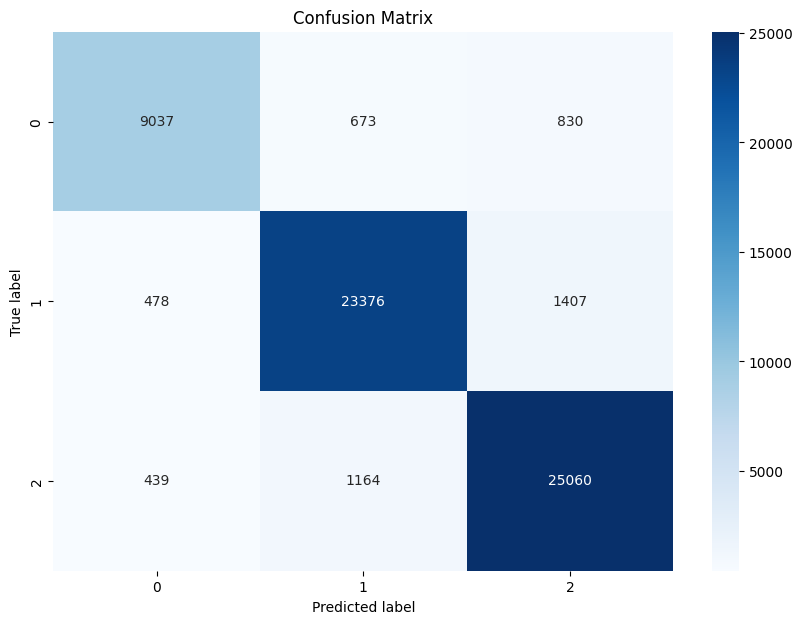

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert one-hot encoded predictions and labels to class indices
y_pred_classes = np.argmax(modelCNN.predict(x_val), axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

1952/1952 [==============================] - 9s 5ms/step


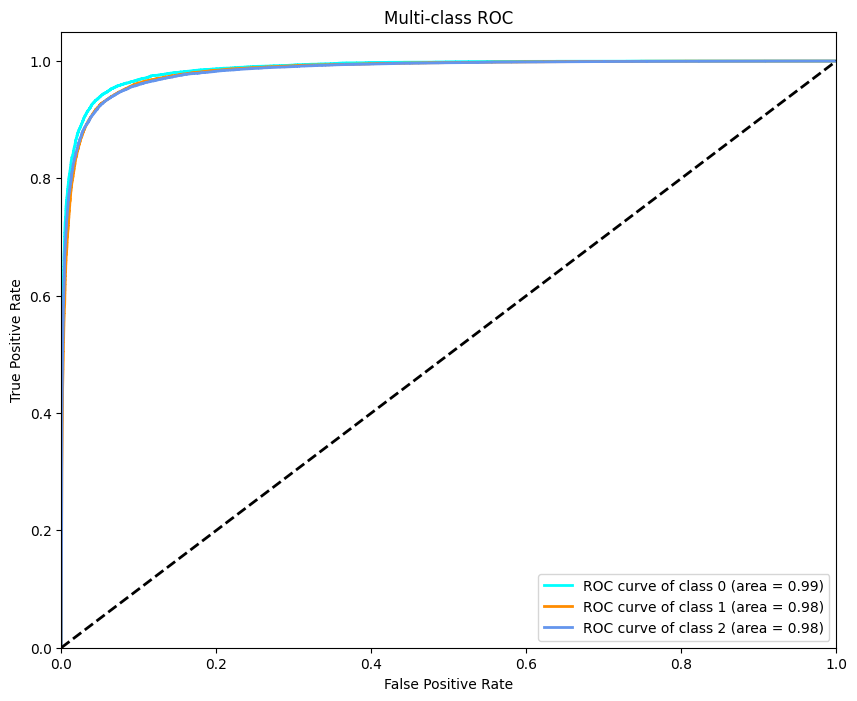

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from scipy import interp

# Assuming `model` is your trained CNN model
# `X_test` is your test data, `y_test` are your true labels (as integers 0, 1, 2 for negative, neutral, positive)

# Binarize the labels for ROC calculation
y_test_binarized = label_binarize(y_test, classes=[negative, neutral, positive])
n_classes = y_test_binarized.shape[1]

# Predict probabilities for each class
y_score = modelCNN.predict(x_test)  # Ensure this gives you the probability for each class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

Model CNN+BiLSTM

In [46]:
model_HB = Sequential()

intput_shape=(x_train.shape[1], 1)

model_HB.add(Conv1D(1024, kernel_size=9,padding = 'same',activation='relu', input_shape=input_shape))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))

model_HB.add(Conv1D(512,kernel_size=6,padding = 'same', activation='relu'))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))

model_HB.add(Conv1D(256,kernel_size=6,padding = 'same', activation='relu'))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))

model_HB.add(Conv1D(128,kernel_size=6,padding = 'same', activation='relu'))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))


model_HB.add(LSTM(units=64,return_sequences=True))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))
model_HB.add(Dropout(0.2))

model_HB.add(LSTM(units=128,return_sequences=True))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))
model_HB.add(Dropout(0.2))

model_HB.add(LSTM(units=128,return_sequences=True))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))
model_HB.add(Dropout(0.2))

model_HB.add(LSTM(units=256,return_sequences=True))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))

model_HB.add(Flatten())

model_HB.add(Dense(1024, activation='relu'))
model_HB.add(Dropout(0.2))

model_HB.add(Dense(256, activation='relu'))
model_HB.add(Dropout(0.2))

model_HB.add(Dense(64, activation='relu'))
model_HB.add(Dropout(0.2))

model_HB.add(Dense(num_classes, activation='softmax'))

model_HB.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 75, 1024)          10240     
                                                                 
 batch_normalization_16 (Ba  (None, 75, 1024)          4096      
 tchNormalization)                                               
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 37, 1024)          0         
 ng1D)                                                           
                                                                 
 conv1d_17 (Conv1D)          (None, 37, 512)           3146240   
                                                                 
 batch_normalization_17 (Ba  (None, 37, 512)           2048      
 tchNormalization)                                               
                                                      

In [47]:
model_HB.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy', Precision(), F1Score()]
)

In [50]:
model_name = "FHybrid_model"
directory_path = "/content/drive/MyDrive/Final work"
weights_filename = "weights-improvement_" + model_name + ".hdf5"
os.makedirs(directory_path, exist_ok=True)

# Complete file path for the model weights
filepath_CLB = os.path.join(directory_path, weights_filename)
print("Model weights will be saved to:", filepath_CLB)

checkpoint = ModelCheckpoint(filepath_CLB, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.2, patience=2, min_lr=0.001, verbose=1)

# Combine all callbacks in a list
callbacks_list = [es, checkpoint, reduce_lr]

Model weights will be saved to: /content/drive/MyDrive/Final work/weights-improvement_FHybrid_model.hdf5


In [51]:
FHybridmodel = model_HB.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks= callbacks_list)

Epoch 1/30
1952/1952 [==============================] - ETA: 0s - loss: 0.8294 - accuracy: 0.5945 - precision_4: 0.6709 - f1_score: 0.5354
Epoch 1: val_accuracy improved from -inf to 0.65215, saving model to /content/drive/MyDrive/Final work/weights-improvement_FHybrid_model.hdf5
1952/1952 [==============================] - 192s 90ms/step - loss: 0.8294 - accuracy: 0.5945 - precision_4: 0.6709 - f1_score: 0.5354 - val_loss: 0.7308 - val_accuracy: 0.6522 - val_precision_4: 0.7112 - val_f1_score: 0.6249 - lr: 0.0010
Epoch 2/30
1952/1952 [==============================] - ETA: 0s - loss: 0.6792 - accuracy: 0.6838 - precision_4: 0.7440 - f1_score: 0.6613
Epoch 2: val_accuracy improved from 0.65215 to 0.71611, saving model to /content/drive/MyDrive/Final work/weights-improvement_FHybrid_model.hdf5
1952/1952 [==============================] - 181s 92ms/step - loss: 0.6792 - accuracy: 0.6838 - precision_4: 0.7440 - f1_score: 0.6613 - val_loss: 0.6207 - val_accuracy: 0.7161 - val_precision_4: 

In [52]:
score_Hybrid = model_HB.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score_Hybrid[0])
print('Test accuracy:', score_Hybrid[1])
print('Test precision:', score_Hybrid[2])
print('Test f1_score:', score_Hybrid[3])

1952/1952 [==============================] - 20s 9ms/step - loss: 0.2795 - accuracy: 0.9128 - precision_4: 0.9166 - f1_score: 0.9131
Test loss: 0.2794507145881653
Test accuracy: 0.9128298163414001
Test precision: 0.9166035056114197
Test f1_score: 0.9131345748901367


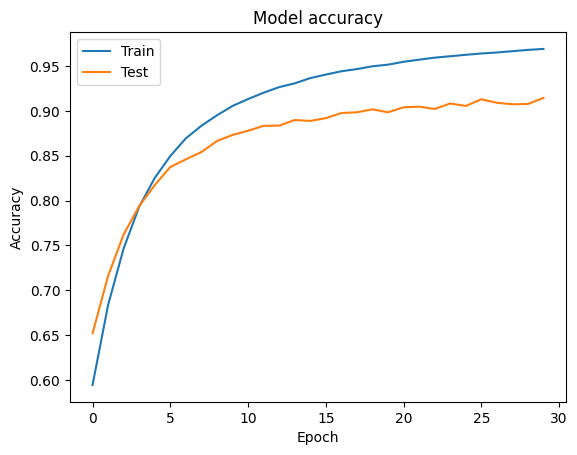

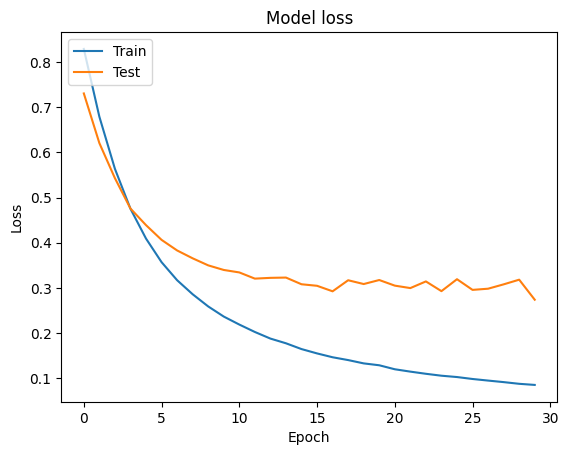

In [53]:
# Plot training & validation accuracy values
plt.plot(FHybridmodel.history['accuracy'])
plt.plot(FHybridmodel.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(FHybridmodel.history['loss'])
plt.plot(FHybridmodel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1952/1952 [==============================] - 16s 7ms/step


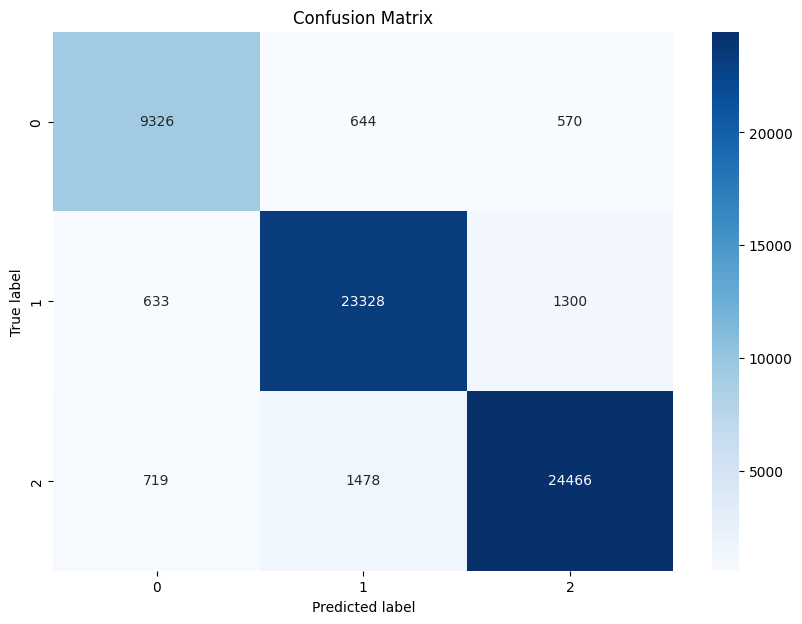

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert one-hot encoded predictions and labels to class indices
y_pred_classes = np.argmax(model_HB.predict(x_val), axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

1952/1952 [==============================] - 14s 7ms/step


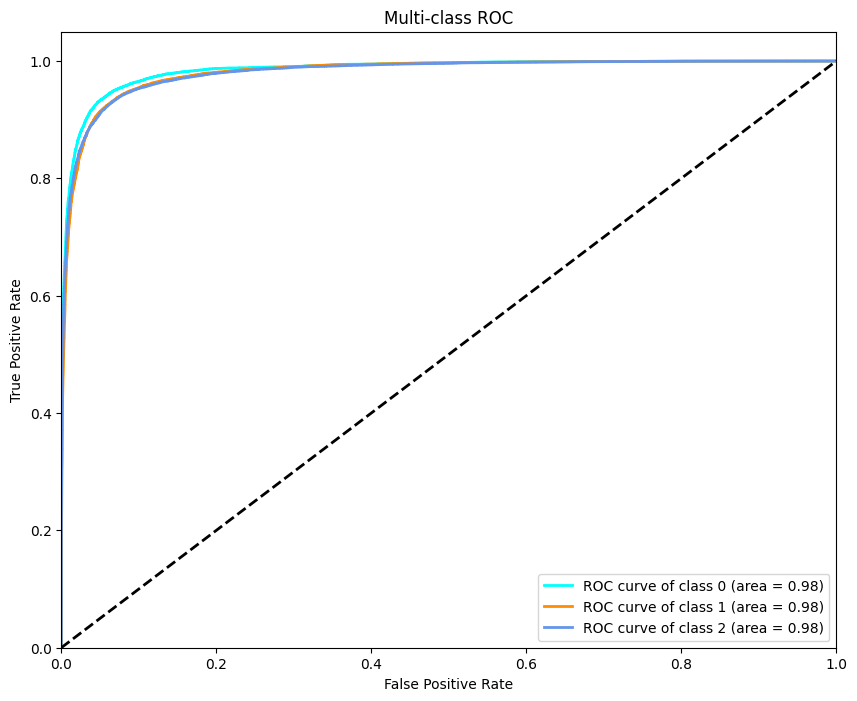

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from scipy import interp

# Assuming `model` is your trained CNN model
# `X_test` is your test data, `y_test` are your true labels (as integers 0, 1, 2 for negative, neutral, positive)

# Binarize the labels for ROC calculation
y_test_binarized = label_binarize(y_test, classes=[negative, neutral, positive])
n_classes = y_test_binarized.shape[1]

# Predict probabilities for each class
y_score = model_HB.predict(x_test)  # Ensure this gives you the probability for each class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()


In [ ]:
base_path_model = "/content/drive/MyDrive/Thesis/"
accuracy = "_86"

path_model_HB = base_path_model + model_name + accuracy + ".h5"
model_HB.save(path_model_HB)
print(path_model_HB)

/content/drive/MyDrive/Thesis/FHybrid_model_86.h5
